## Activation function (ReLU)

In [26]:
#Importing the libraries

import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

In [27]:
# Taking the input data

# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)


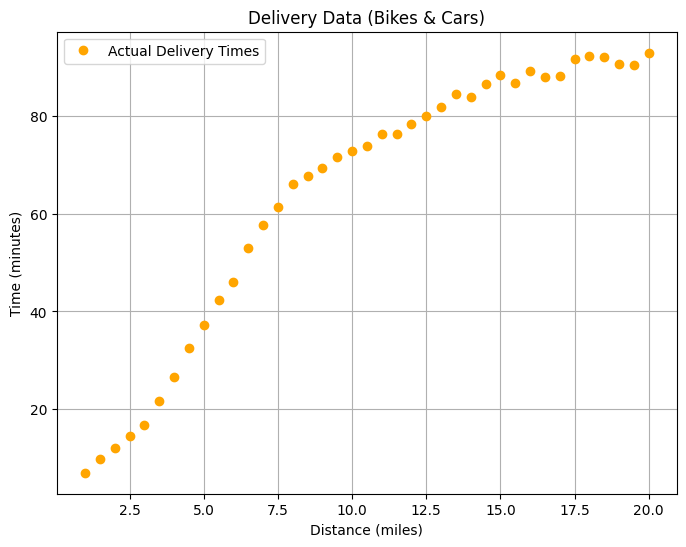

In [28]:
helper_utils.plot_data(distances, times)

In [29]:
# Normalising the scale --> makes training process more stable

distances_mean = distances.mean()
distances_std = distances.std()


times_mean = times.mean()
times_std = times.std()


distances_norm = (distances - distances_mean)/distances_std
times_norm = (times - times_mean)/times_std

print(f"Normalised distance:{distances_norm}\n\nNormalised time:{times_norm}")

Normalised distance:tensor([[-1.6664],
        [-1.5787],
        [-1.4910],
        [-1.4033],
        [-1.3156],
        [-1.2279],
        [-1.1402],
        [-1.0525],
        [-0.9648],
        [-0.8771],
        [-0.7894],
        [-0.7016],
        [-0.6139],
        [-0.5262],
        [-0.4385],
        [-0.3508],
        [-0.2631],
        [-0.1754],
        [-0.0877],
        [ 0.0000],
        [ 0.0877],
        [ 0.1754],
        [ 0.2631],
        [ 0.3508],
        [ 0.4385],
        [ 0.5262],
        [ 0.6139],
        [ 0.7016],
        [ 0.7894],
        [ 0.8771],
        [ 0.9648],
        [ 1.0525],
        [ 1.1402],
        [ 1.2279],
        [ 1.3156],
        [ 1.4033],
        [ 1.4910],
        [ 1.5787],
        [ 1.6664]])

Normalised time:tensor([[-2.0442],
        [-1.9472],
        [-1.8599],
        [-1.7722],
        [-1.6931],
        [-1.5166],
        [-1.3441],
        [-1.1311],
        [-0.9636],
        [-0.7775],
        [-0.6433],
        [-0.

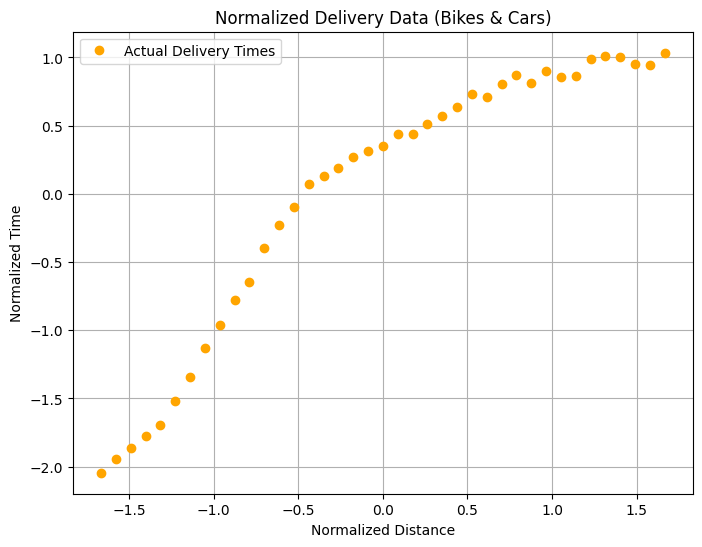

In [17]:
# Plotting the normalised input
helper_utils.plot_data(distances_norm, times_norm, normalize = True)

In [30]:
# Defining the model

model = nn.Sequential(nn.Linear(1,3), nn.ReLU(), nn.Linear(3,1))


In [31]:
# Defining the loss parameter & SGD

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

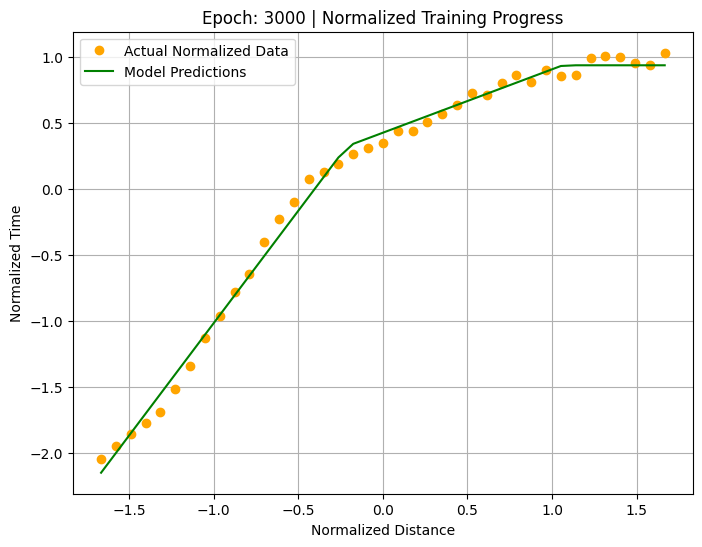


Training Complete.

Final Loss: 0.004902241751551628


In [33]:
# Training the model

for epoch in range(3000):
    #Reset the optim
    optimizer.zero_grad()
    
    #Placing the input
    output = model(distances_norm)
    
    
    # Estimating the loss
    
    loss = loss_function(output, times_norm)
    
    
    # Back propagation
    loss.backward()
    
    
    #Update the model parameters
    optimizer.step()
    
    
    if (epoch + 1)%50  == 0:
        helper_utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=distances_norm,
            times_norm=times_norm
        )
        

print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")    

In [42]:
# Prediction on a scalar distance

"""Let us predict the model for a scalar distance, where distance = 5.1 """

distance_to_predict = 5.1

# Don't calculate any gradient, faster compute--> we use torch.no_grad()
with torch.no_grad():
    
    
    # Defining the i/p
    user_input = torch.tensor([[distance_to_predict]], dtype = torch.float32)
    
    # Normalising the i/p (sclaing it) using training mean & std
    user_input_norm = (user_input - distances_mean)/distances_std
    print(f"User input: {user_input.item()}; User input norm: {user_input_norm.item()}")
    
    
    # initialising the model
    predicted_user_input_norm = model(user_input_norm)
    predicted_time_actual = (predicted_user_input_norm * times_std) + times_mean
    
    
    print(f"Predicted time for a {distance_to_predict} delivery: {predicted_time_actual.item():.2f}")

User input: 5.099999904632568; User input norm: -0.9472226500511169
Predicted time for a 5.1 delivery: 38.23
